--- Final Simulation Results (End of Year 10) ---
                     Metric Shareholder Model (Year 10) Stakeholder Model (Year 10) Difference (SH - ST)
             Price per Unit                     $128.01                     $121.90                    6
              Quantity Sold                         882                        1161                 -279
                    Revenue                    $112,878                    $141,469              -28,591
                Total Costs                    $107,513                    $117,239               -9,726
                     Profit                      $5,365                     $24,230              -18,865
          Profit Margin (%)                       4.75%                      17.13%            -12.37 pp
                    ROI (%)                       4.99%                      20.67%            -15.68 pp
Total Stakeholder Value (W)                         N/A                     $23,492    -23,492 (ST only)

Note

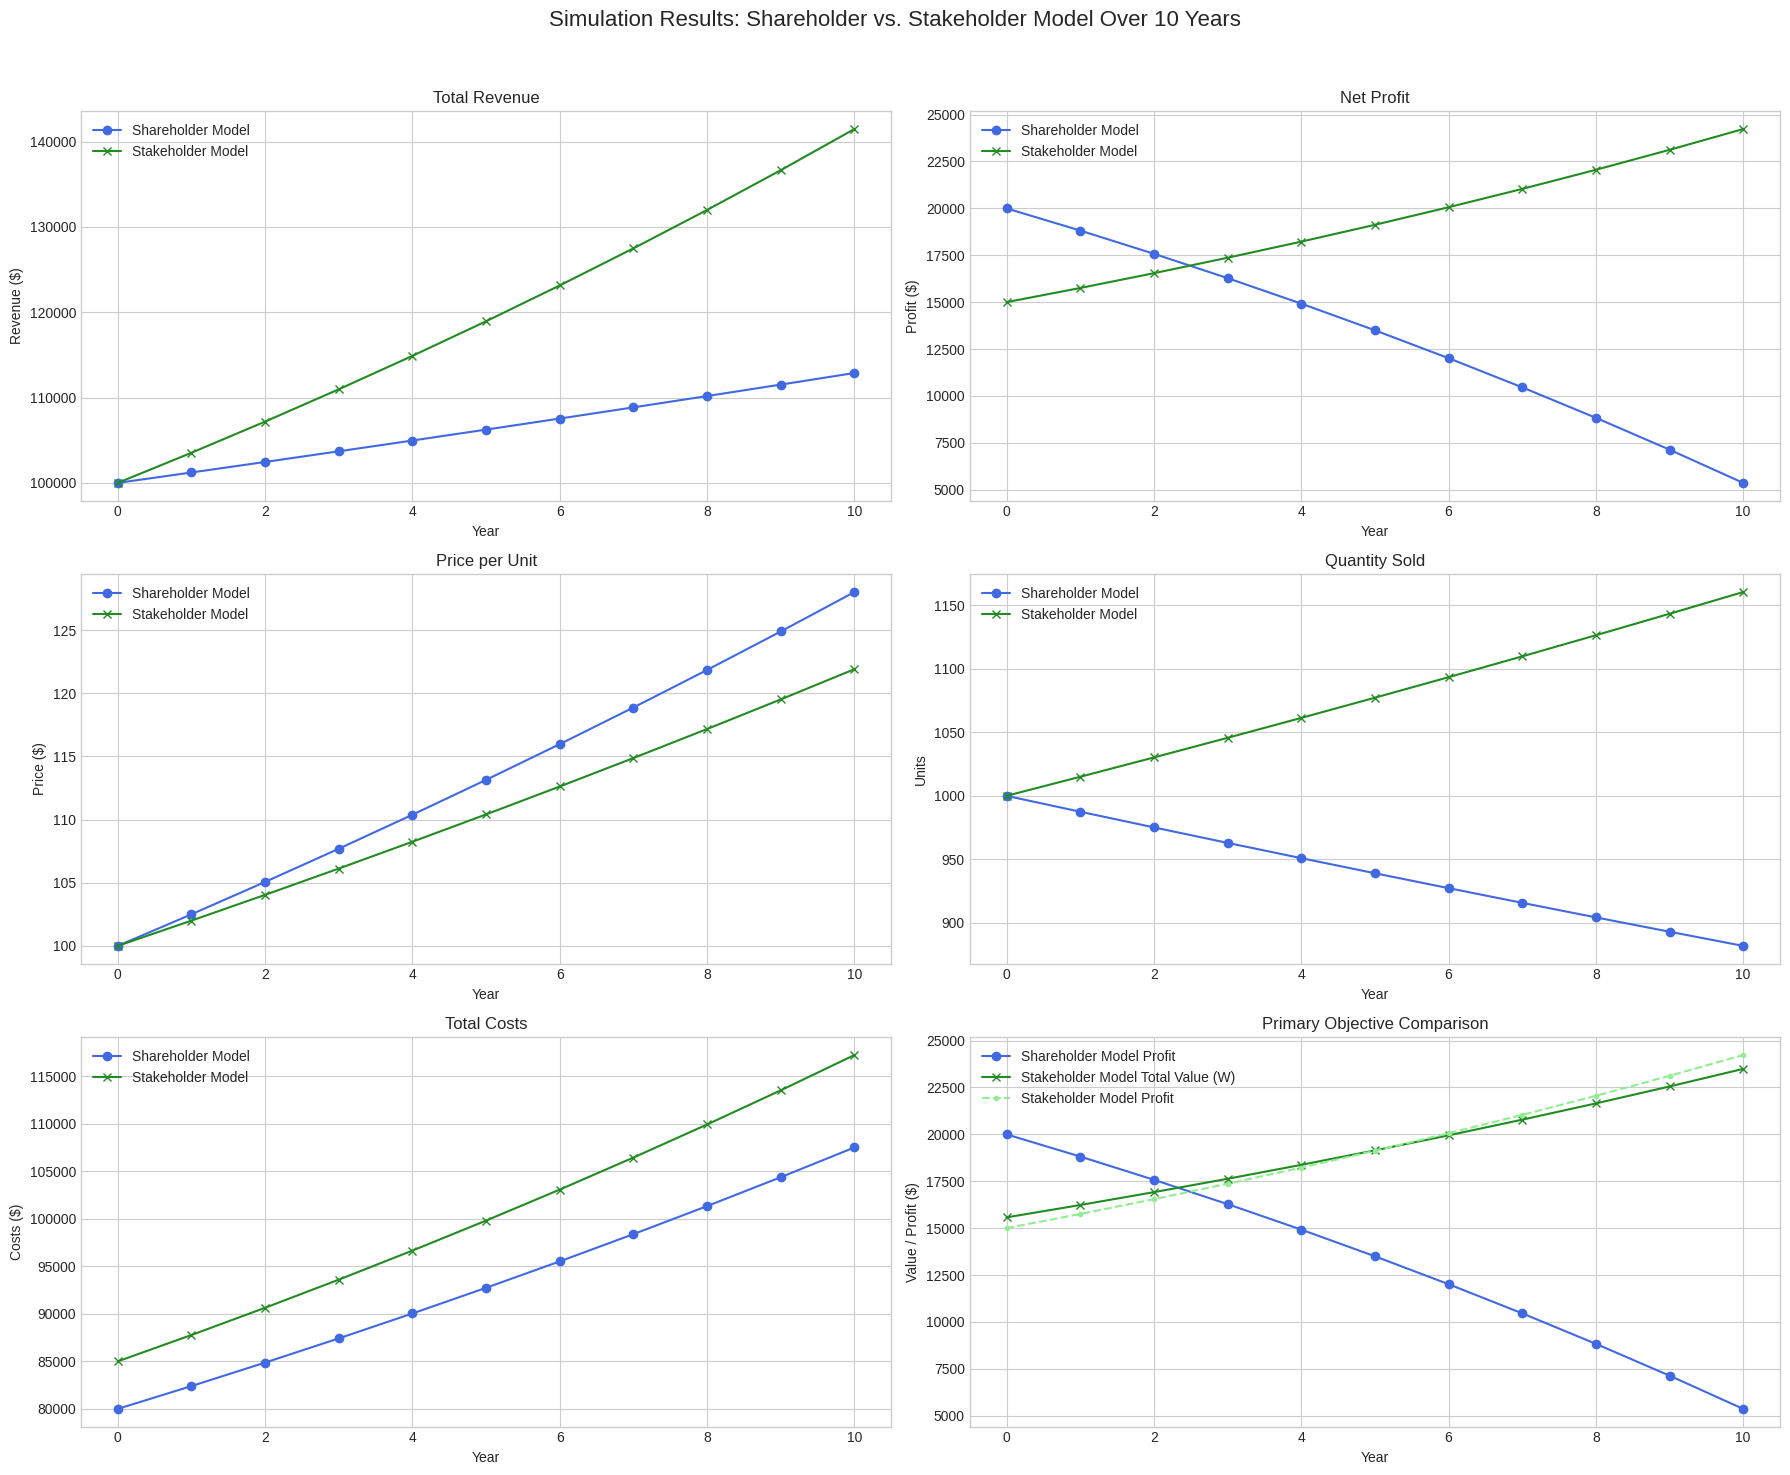

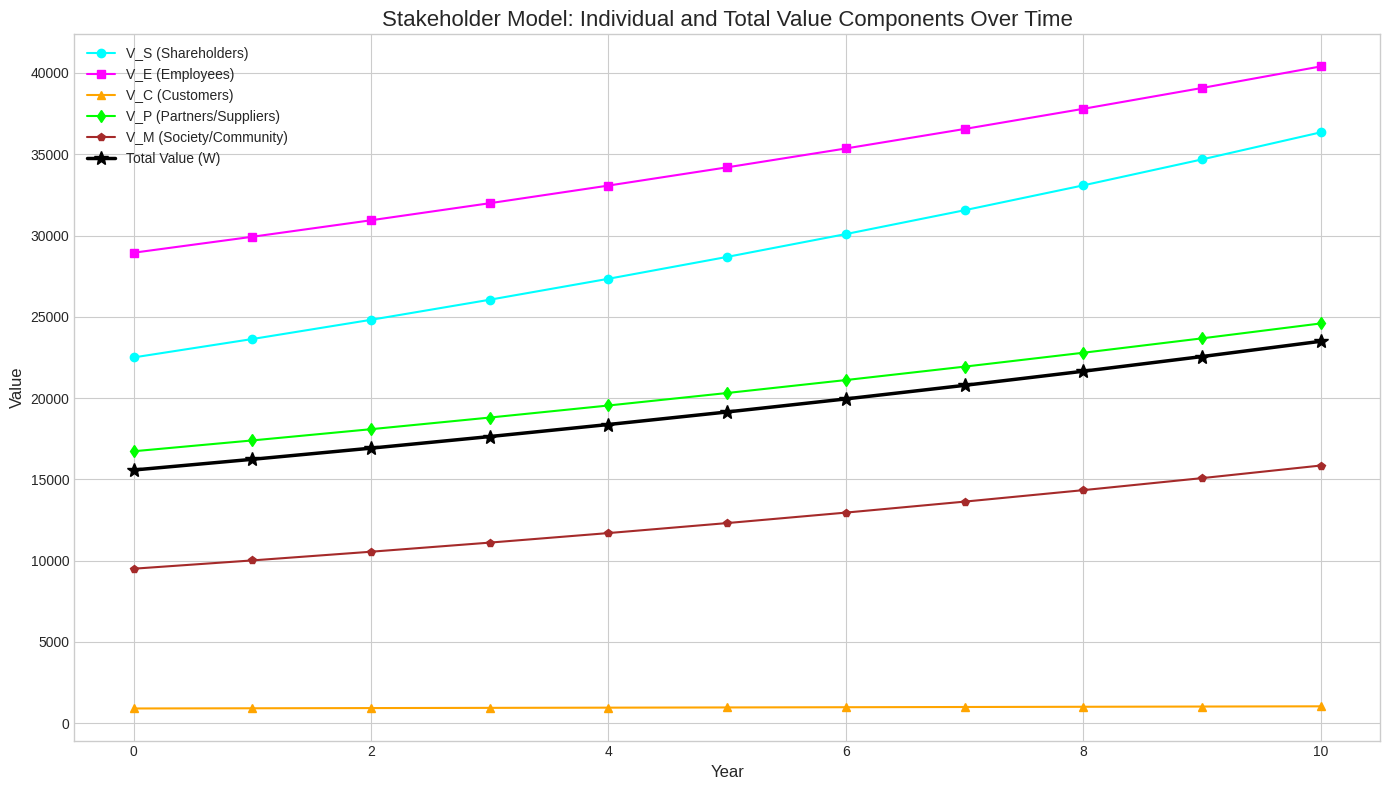

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Initial Conditions ---
initial_conditions = {
    'Price': 100,
    'Quantity': 1000,
    'Labor Costs': 30000,
    'Materials Costs': 25000,
    'Operations Costs': 15000,
    'Taxes': 10000,
    'Community Costs_Stakeholder': 5000, # Only for stakeholder model
    'Simulation Period': 10
}
initial_revenue = initial_conditions['Price'] * initial_conditions['Quantity']

# --- 2. Growth and Cost Factors (Annual Rates) ---
growth_factors = {
    'Base Growth Rate': 0.05,
    'Price Increase Rate Shareholder': 0.025,
    'Price Increase Rate Stakeholder': 0.02,
    'Quantity Change Rate Shareholder': -0.0125,
    'Quantity Change Rate Stakeholder': 0.015,
    'Cost Increase Rate General': 0.03,
    'Stakeholder Cost Adjustments': {
        'Labor': 0.033,
        'Operations': 0.036,
        'Community': 0.039
    }
}

# --- 3. Stakeholder Weights (Stakeholder Model) ---
stakeholder_weights = {
    'Shareholders': 0.25,
    'Employees': 0.20,
    'Customers': 0.25,
    'Partners/Suppliers': 0.15,
    'Society/Community': 0.15
}

# --- 4. Value Function Parameters (Stakeholder Model) ---
value_function_params = {
    'Shareholders': {'Alpha': 1.0, 'Beta': 0.5},
    'Employees': {'Gamma': 0.7, 'Delta': 0.3},
    'Customers': {'Epsilon': 0.6, 'Zeta': 0.4},
    'Partners': {'Eta': 0.5, 'Theta': 0.5},
    'Society': {'Iota': 0.7, 'Kappa': 0.3}
}

# --- Lists to store results ---
shareholder_results_list = []
stakeholder_results_list = []

# --- Simulation Loop ---
sim_years = initial_conditions['Simulation Period']

# Initialize Shareholder Model variables for Year 0
sh_price = initial_conditions['Price']
sh_quantity = initial_conditions['Quantity']
sh_labor_costs = initial_conditions['Labor Costs']
sh_materials_costs = initial_conditions['Materials Costs']
sh_operations_costs = initial_conditions['Operations Costs']
sh_taxes = initial_conditions['Taxes']

# Initialize Stakeholder Model variables for Year 0
st_price = initial_conditions['Price']
st_quantity = initial_conditions['Quantity']
st_labor_costs = initial_conditions['Labor Costs']
st_materials_costs = initial_conditions['Materials Costs']
st_operations_costs = initial_conditions['Operations Costs']
st_taxes = initial_conditions['Taxes']
st_community_costs = initial_conditions['Community Costs_Stakeholder']


for year in range(sim_years + 1): # +1 to include initial state as Year 0
    # --- Shareholder Model Calculations ---
    if year == 0:
        current_sh_price = sh_price
        current_sh_quantity = sh_quantity
        current_sh_labor_costs = sh_labor_costs
        current_sh_materials_costs = sh_materials_costs
        current_sh_operations_costs = sh_operations_costs
        current_sh_taxes = sh_taxes
    else:
        current_sh_price = sh_price * (1 + growth_factors['Price Increase Rate Shareholder'])
        current_sh_quantity = sh_quantity * (1 + growth_factors['Quantity Change Rate Shareholder'])
        current_sh_labor_costs = sh_labor_costs * (1 + growth_factors['Cost Increase Rate General'])
        current_sh_materials_costs = sh_materials_costs * (1 + growth_factors['Cost Increase Rate General'])
        current_sh_operations_costs = sh_operations_costs * (1 + growth_factors['Cost Increase Rate General'])
        current_sh_taxes = sh_taxes * (1 + growth_factors['Cost Increase Rate General'])

    sh_revenue = current_sh_price * current_sh_quantity
    sh_total_costs = current_sh_labor_costs + current_sh_materials_costs + current_sh_operations_costs + current_sh_taxes
    sh_profit = sh_revenue - sh_total_costs
    sh_profit_margin = (sh_profit / sh_revenue) if sh_revenue > 0 else 0
    sh_roi = (sh_profit / sh_total_costs) if sh_total_costs > 0 else 0

    shareholder_results_list.append({
        'Year': year,
        'Price': current_sh_price,
        'Quantity': current_sh_quantity,
        'Revenue': sh_revenue,
        'Labor Costs': current_sh_labor_costs,
        'Materials Costs': current_sh_materials_costs,
        'Operations Costs': current_sh_operations_costs,
        'Taxes': current_sh_taxes,
        'Total Costs': sh_total_costs,
        'Profit': sh_profit,
        'Profit Margin': sh_profit_margin,
        'ROI': sh_roi
    })

    sh_price = current_sh_price
    sh_quantity = current_sh_quantity
    sh_labor_costs = current_sh_labor_costs
    sh_materials_costs = current_sh_materials_costs
    sh_operations_costs = current_sh_operations_costs
    sh_taxes = current_sh_taxes

    # --- Stakeholder Model Calculations ---
    if year == 0:
        current_st_price = st_price
        current_st_quantity = st_quantity
        current_st_labor_costs = st_labor_costs
        current_st_materials_costs = st_materials_costs
        current_st_operations_costs = st_operations_costs
        current_st_taxes = st_taxes
        current_st_community_costs = st_community_costs
    else:
        current_st_price = st_price * (1 + growth_factors['Price Increase Rate Stakeholder'])
        current_st_quantity = st_quantity * (1 + growth_factors['Quantity Change Rate Stakeholder'])
        current_st_labor_costs = st_labor_costs * (1 + growth_factors['Stakeholder Cost Adjustments']['Labor'])
        current_st_materials_costs = st_materials_costs * (1 + growth_factors['Cost Increase Rate General'])
        current_st_operations_costs = st_operations_costs * (1 + growth_factors['Stakeholder Cost Adjustments']['Operations'])
        current_st_taxes = st_taxes * (1 + growth_factors['Cost Increase Rate General'])
        current_st_community_costs = st_community_costs * (1 + growth_factors['Stakeholder Cost Adjustments']['Community'])

    st_revenue = current_st_price * current_st_quantity
    st_total_costs_with_community = current_st_labor_costs + current_st_materials_costs + current_st_operations_costs + current_st_taxes + current_st_community_costs
    st_profit = st_revenue - st_total_costs_with_community
    st_profit_margin = (st_profit / st_revenue) if st_revenue > 0 else 0
    st_roi = (st_profit / st_total_costs_with_community) if st_total_costs_with_community > 0 else 0

    V_S = (value_function_params['Shareholders']['Alpha'] * st_profit +
           value_function_params['Shareholders']['Beta'] * st_roi * st_total_costs_with_community)

    safety_index_denom = st_total_costs_with_community * 0.2
    safety_index = min(1.0, current_st_operations_costs / safety_index_denom) if safety_index_denom > 0 else 0
    V_E = (value_function_params['Employees']['Gamma'] * current_st_labor_costs +
           value_function_params['Employees']['Delta'] * safety_index * current_st_labor_costs)

    quality_denom = st_total_costs_with_community * 0.5
    quality_val = min(1.0, (current_st_materials_costs + current_st_operations_costs) / quality_denom) if quality_denom > 0 else 0
    price_fairness_val = max(0, 1 - st_profit_margin)
    V_C = (value_function_params['Customers']['Epsilon'] * quality_val * current_st_quantity +
           value_function_params['Customers']['Zeta'] * price_fairness_val * current_st_quantity)

    contract_stability_denom = st_total_costs_with_community * 0.3
    contract_stability_val = min(1.0, current_st_operations_costs / contract_stability_denom) if contract_stability_denom > 0 else 0
    payment_terms_denom = st_revenue * 0.2
    payment_terms_val = min(1.0, st_profit / payment_terms_denom) if payment_terms_denom > 0 and st_profit > 0 else 0
    V_P = (value_function_params['Partners']['Eta'] * contract_stability_val * current_st_materials_costs +
           value_function_params['Partners']['Theta'] * payment_terms_val * current_st_materials_costs)

    esg_score_denom = st_total_costs_with_community * 0.25
    esg_score_val_part1 = min(1.0, current_st_operations_costs / esg_score_denom) if esg_score_denom > 0 else 0
    esg_score_val = esg_score_val_part1 * (1 - (st_profit_margin * 0.5))
    community_engagement_denom = st_total_costs_with_community * 0.1
    community_engagement_val = min(1.0, current_st_community_costs / community_engagement_denom) if community_engagement_denom > 0 else 0

    V_M_profit_component = st_profit if st_profit > 0 else 0 # Avoid negative profit multiplying these positive factors
    V_M = (value_function_params['Society']['Iota'] * esg_score_val * V_M_profit_component +
           value_function_params['Society']['Kappa'] * community_engagement_val * V_M_profit_component)

    W = (stakeholder_weights['Shareholders'] * V_S +
         stakeholder_weights['Employees'] * V_E +
         stakeholder_weights['Customers'] * V_C +
         stakeholder_weights['Partners/Suppliers'] * V_P +
         stakeholder_weights['Society/Community'] * V_M)

    stakeholder_results_list.append({
        'Year': year,
        'Price': current_st_price,
        'Quantity': current_st_quantity,
        'Revenue': st_revenue,
        'Labor Costs': current_st_labor_costs,
        'Materials Costs': current_st_materials_costs,
        'Operations Costs': current_st_operations_costs,
        'Taxes': current_st_taxes,
        'Community Costs': current_st_community_costs,
        'Total Costs': st_total_costs_with_community,
        'Profit': st_profit,
        'Profit Margin': st_profit_margin,
        'ROI': st_roi,
        'V_S': V_S, 'V_E': V_E, 'V_C': V_C, 'V_P': V_P, 'V_M': V_M,
        'Total Stakeholder Value (W)': W
    })

    st_price = current_st_price
    st_quantity = current_st_quantity
    st_labor_costs = current_st_labor_costs
    st_materials_costs = current_st_materials_costs
    st_operations_costs = current_st_operations_costs
    st_taxes = current_st_taxes
    st_community_costs = current_st_community_costs

df_shareholder = pd.DataFrame(shareholder_results_list)
df_stakeholder = pd.DataFrame(stakeholder_results_list)

# --- Final Simulation Results (Numerical Table - Year 10) ---
final_year_results_sh = df_shareholder.iloc[-1] # Year 10 data
final_year_results_st = df_stakeholder.iloc[-1] # Year 10 data

# Prepare data for the comparison table including differences
metrics_data = {
    "Metric": [
        "Price per Unit", "Quantity Sold", "Revenue", "Total Costs", "Profit",
        "Profit Margin (%)", "ROI (%)", "Total Stakeholder Value (W)"
    ],
    "Shareholder Model (Year 10)": [
        final_year_results_sh['Price'],
        final_year_results_sh['Quantity'],
        final_year_results_sh['Revenue'],
        final_year_results_sh['Total Costs'],
        final_year_results_sh['Profit'],
        final_year_results_sh['Profit Margin'] * 100,
        final_year_results_sh['ROI'] * 100,
        None # Shareholder model does not calculate W
    ],
    "Stakeholder Model (Year 10)": [
        final_year_results_st['Price'],
        final_year_results_st['Quantity'],
        final_year_results_st['Revenue'],
        final_year_results_st['Total Costs'],
        final_year_results_st['Profit'],
        final_year_results_st['Profit Margin'] * 100,
        final_year_results_st['ROI'] * 100,
        final_year_results_st['Total Stakeholder Value (W)']
    ]
}

# Calculate Differences (SH - ST)
differences = []
for i in range(len(metrics_data["Metric"])):
    sh_val = metrics_data["Shareholder Model (Year 10)"][i]
    st_val = metrics_data["Stakeholder Model (Year 10)"][i]

    if sh_val is not None and st_val is not None:
        diff = sh_val - st_val
        if metrics_data["Metric"][i] in ["Profit Margin (%)", "ROI (%)"]:
            differences.append(f"{diff:.2f} pp") # percentage points
        elif metrics_data["Metric"][i] == "Quantity Sold":
             differences.append(f"{diff:.0f}")
        else:
            differences.append(f"{diff:,.0f}")
    elif st_val is not None: # Handles "Total Stakeholder Value (W)" where SH is None
        differences.append(f"{-st_val:,.0f} (ST only)") # Show ST value as negative diff, or state ST only
    else:
        differences.append("N/A")

metrics_data["Difference (SH - ST)"] = differences

# Format for display
formatted_table_data = {
    "Metric": metrics_data["Metric"],
    "Shareholder Model (Year 10)": [
        f"${val:.2f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] == "Price per Unit" else
        f"{val:.0f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] == "Quantity Sold" else
        f"${val:,.0f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] in ["Revenue", "Total Costs", "Profit"] else
        f"{val:.2f}%" if isinstance(val, (int, float)) and metrics_data["Metric"][i] in ["Profit Margin (%)", "ROI (%)"] else
        "N/A" if val is None else f"{val:,.0f}" # For W in SH
        for i, val in enumerate(metrics_data["Shareholder Model (Year 10)"])
    ],
    "Stakeholder Model (Year 10)": [
        f"${val:.2f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] == "Price per Unit" else
        f"{val:.0f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] == "Quantity Sold" else
        f"${val:,.0f}" if isinstance(val, (int, float)) and metrics_data["Metric"][i] in ["Revenue", "Total Costs", "Profit", "Total Stakeholder Value (W)"] else
        f"{val:.2f}%" if isinstance(val, (int, float)) and metrics_data["Metric"][i] in ["Profit Margin (%)", "ROI (%)"] else
        "N/A"
        for i, val in enumerate(metrics_data["Stakeholder Model (Year 10)"])
    ],
    "Difference (SH - ST)": metrics_data["Difference (SH - ST)"] # Already formatted
}


comparison_df = pd.DataFrame(formatted_table_data)

print("--- Final Simulation Results (End of Year 10) ---")
print(comparison_df.to_string(index=False))
print("\nNote: Year 0 represents initial conditions. Year 10 represents the state after 10 periods of change.")
print("pp = percentage points difference.")

# --- Graphical Results ---
plt.style.use('seaborn-v0_8-whitegrid')

fig, axs = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Simulation Results: Shareholder vs. Stakeholder Model Over 10 Years', fontsize=16)

# 1. Revenue
axs[0, 0].plot(df_shareholder['Year'], df_shareholder['Revenue'], label='Shareholder Model', marker='o', color='royalblue')
axs[0, 0].plot(df_stakeholder['Year'], df_stakeholder['Revenue'], label='Stakeholder Model', marker='x', color='forestgreen')
axs[0, 0].set_title('Total Revenue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Revenue ($)')
axs[0, 0].legend()
axs[0, 0].ticklabel_format(style='plain', axis='y')


# 2. Profit
axs[0, 1].plot(df_shareholder['Year'], df_shareholder['Profit'], label='Shareholder Model', marker='o', color='royalblue')
axs[0, 1].plot(df_stakeholder['Year'], df_stakeholder['Profit'], label='Stakeholder Model', marker='x', color='forestgreen')
axs[0, 1].set_title('Net Profit')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Profit ($)')
axs[0, 1].legend()
axs[0, 1].ticklabel_format(style='plain', axis='y')

# 3. Price per Unit
axs[1, 0].plot(df_shareholder['Year'], df_shareholder['Price'], label='Shareholder Model', marker='o', color='royalblue')
axs[1, 0].plot(df_stakeholder['Year'], df_stakeholder['Price'], label='Stakeholder Model', marker='x', color='forestgreen')
axs[1, 0].set_title('Price per Unit')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Price ($)')
axs[1, 0].legend()

# 4. Quantity Sold
axs[1, 1].plot(df_shareholder['Year'], df_shareholder['Quantity'], label='Shareholder Model', marker='o', color='royalblue')
axs[1, 1].plot(df_stakeholder['Year'], df_stakeholder['Quantity'], label='Stakeholder Model', marker='x', color='forestgreen')
axs[1, 1].set_title('Quantity Sold')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Units')
axs[1, 1].legend()

# 5. Total Costs
axs[2, 0].plot(df_shareholder['Year'], df_shareholder['Total Costs'], label='Shareholder Model', marker='o', color='royalblue')
axs[2, 0].plot(df_stakeholder['Year'], df_stakeholder['Total Costs'], label='Stakeholder Model', marker='x', color='forestgreen')
axs[2, 0].set_title('Total Costs')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Costs ($)')
axs[2, 0].legend()
axs[2, 0].ticklabel_format(style='plain', axis='y')

# 6. Total Stakeholder Value (W) vs Shareholder Profit
axs[2, 1].plot(df_shareholder['Year'], df_shareholder['Profit'], label='Shareholder Model Profit', marker='o', color='royalblue')
axs[2, 1].plot(df_stakeholder['Year'], df_stakeholder['Total Stakeholder Value (W)'], label='Stakeholder Model Total Value (W)', marker='x', color='forestgreen')
axs[2, 1].plot(df_stakeholder['Year'], df_stakeholder['Profit'], label='Stakeholder Model Profit', marker='.', color='lightgreen', linestyle='--')
axs[2, 1].set_title('Primary Objective Comparison')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Value / Profit ($)')
axs[2, 1].legend()
axs[2, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- CORRECTED: Combined Stakeholder Value Components Plot ---
plt.figure(figsize=(14, 8))
plt.plot(df_stakeholder['Year'], df_stakeholder['V_S'], label='V_S (Shareholders)', marker='o', color='cyan')
plt.plot(df_stakeholder['Year'], df_stakeholder['V_E'], label='V_E (Employees)', marker='s', color='magenta')
plt.plot(df_stakeholder['Year'], df_stakeholder['V_C'], label='V_C (Customers)', marker='^', color='orange')
plt.plot(df_stakeholder['Year'], df_stakeholder['V_P'], label='V_P (Partners/Suppliers)', marker='d', color='lime')
plt.plot(df_stakeholder['Year'], df_stakeholder['V_M'], label='V_M (Society/Community)', marker='p', color='brown')
plt.plot(df_stakeholder['Year'], df_stakeholder['Total Stakeholder Value (W)'], label='Total Value (W)', marker='*', color='black', linewidth=2.5, markersize=10)

plt.title('Stakeholder Model: Individual and Total Value Components Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()